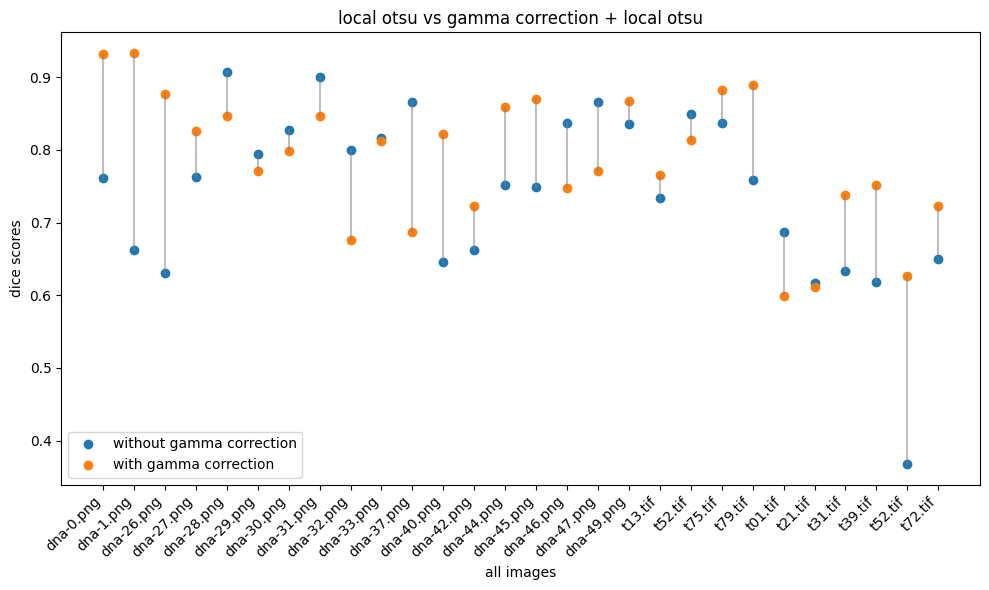

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
from pathlib import Path

# Current folder as project_root
# Going three layers of folders upwards to src
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
src_dir      = os.path.join(project_root, "src")

# Add the src directory to the Python module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

from Plots import plot_pairwise_scores

# Datasets
labels = [
    'dna-0.png',  'dna-1.png',  'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png', 't13.tif', 't52.tif', 't75.tif', 't79.tif',
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif'
    
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))



# Loading
# gamma + otsu local dicesores
NIH3T3_gamma_local = np.load('Dice_score_vectors/gamma+local/NIH3T3_dice_scores_gamma+local.npy')
N2DL_HeLa_gamma_local = np.load('Dice_score_vectors/gamma+local/N2DL-HeLa_dice_scores_gamma+local.npy')
N2DH_GOWT1_gamma_local = np.load('Dice_score_vectors/gamma+local/N2DH-GOWT1_dice_scores_gamma+local.npy')
# otsu local dice scores
df = pd.read_csv(os.path.join(project_root, "best_radius_our_package.csv"))
dice_scores_local_otsu = df["DiceScore"].values

# Combining
all_dice_scores_gamma_local = np.concatenate((NIH3T3_gamma_local, N2DL_HeLa_gamma_local, N2DH_GOWT1_gamma_local))

plot_pairwise_scores(file_names, dice_scores_local_otsu, all_dice_scores_gamma_local, 
                     title="local otsu vs gamma correction + local otsu", 
                     labels=labels,
                     xlabel= "all images",
                     ylabel= "dice scores",
                     legend_labels=("without gamma correction", "with gamma correction"  ))



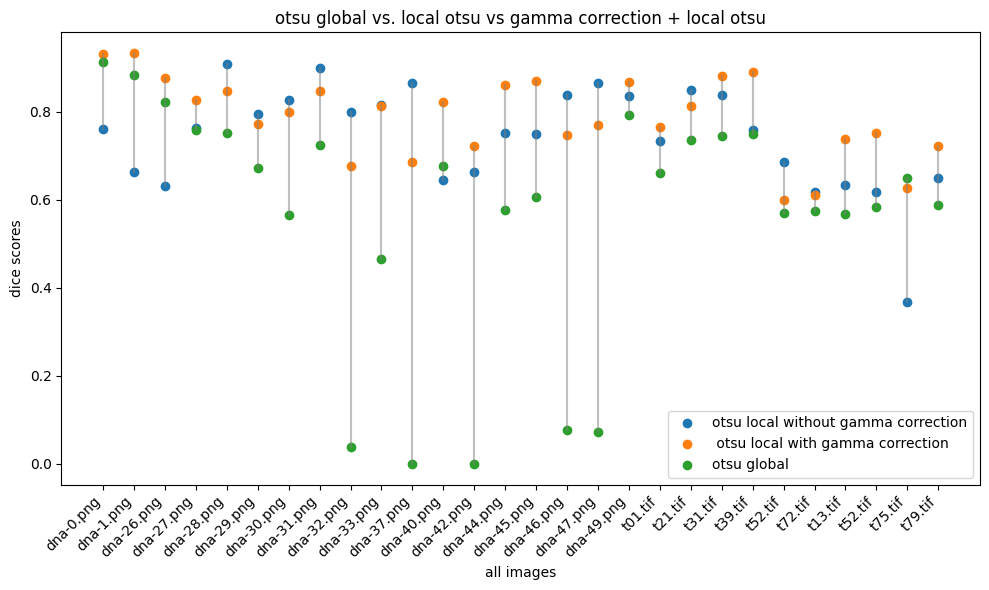

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path

# Current folder as project_root
# Going three layers of folders upwards to src
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
src_dir      = os.path.join(project_root, "src")

# Add the src directory to the Python module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

from Plots import plot_triplet_scores

# Dataset NIH3T3 as an example
labels = [
    'dna-0.png',  'dna-1.png',  'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png', 't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',
    't13.tif', 't52.tif', 't75.tif', 't79.tif'
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

# Loading dice scores of gamma + otsu local
NIH3T3_gamma_local = np.load('Dice_score_vectors/gamma+local/NIH3T3_dice_scores_gamma+local.npy')
N2DL_HeLa_gamma_local = np.load('Dice_score_vectors/gamma+local/N2DL-HeLa_dice_scores_gamma+local.npy')
N2DH_GOWT1_gamma_local = np.load('Dice_score_vectors/gamma+local/N2DH-GOWT1_dice_scores_gamma+local.npy')


# Loading dice scores of otsu global
global_dice_scores = np.load('Dice_score_vectors/otsu_only/all_dice_scores_otsu.npy')


# otsu local dice scores
df = pd.read_csv(os.path.join(project_root, "best_radius_our_package.csv"))
dice_scores_local_otsu = df["DiceScore"].values

# Combining all dice scores for gamma + otsu local
all_dice_scores_gamma_local = np.concatenate((NIH3T3_gamma_local, N2DL_HeLa_gamma_local, N2DH_GOWT1_gamma_local))

plot_triplet_scores(file_names, dice_scores_local_otsu, all_dice_scores_gamma_local, global_dice_scores, 
                     title="otsu global vs. local otsu vs gamma correction + local otsu", 
                     labels=labels,
                     xlabel= "all images",
                     ylabel= "dice scores",
                     legend_labels=("otsu local without gamma correction", " otsu local with gamma correction", "otsu global"   ))

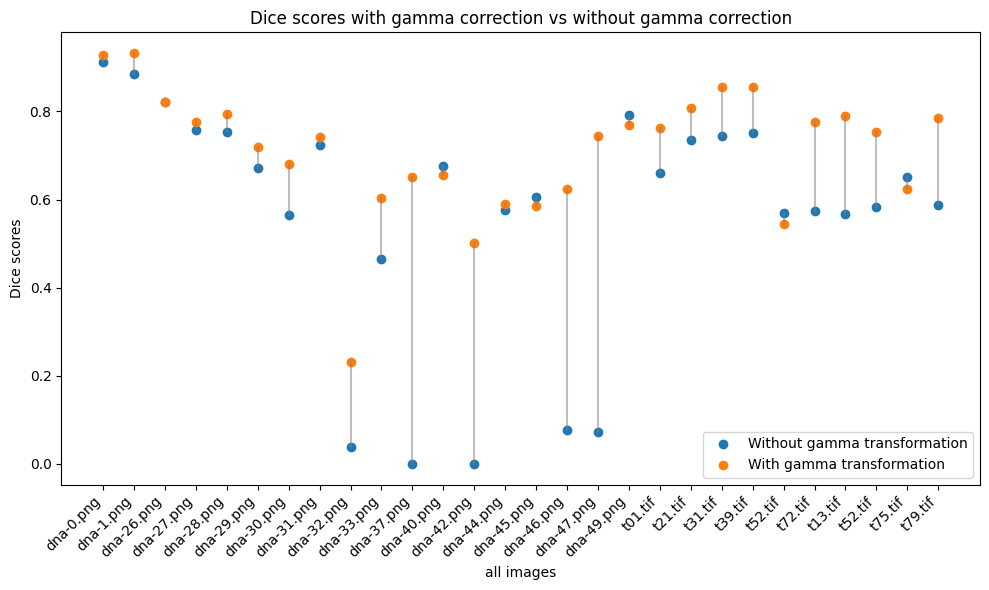

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------
#PLOT FOR GAMMA CORRECTION
#-------------------------

# Dataset NIH3T3 as an example
labels = [
    'dna-0.png',  'dna-1.png',  'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png', 't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',
    't13.tif', 't52.tif', 't75.tif', 't79.tif'
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

# Load the Dice scores from Otsu-only into one array, and those from gamma-correction into another
# Loading
NIH3T3_otsu = np.load('Dice_score_vectors/otsu_only/NIH3T3_otsu_dice_scores.npy')
NIH3T3_gamma = np.load('Dice_score_vectors/gamma/NIH3T3_gamma_dice_scores.npy')
N2DL_HeLa_otsu = np.load('Dice_score_vectors/otsu_only/N2DL-HeLa_otsu_dice_scores.npy')
N2DL_HeLa_gamma = np.load('Dice_score_vectors/gamma/N2DL-HeLa_gamma_dice_scores.npy')
N2DH_GOWT1_otsu = np.load('Dice_score_vectors/otsu_only/N2DH-GOWT1_otsu_dice_scores.npy')
N2DH_GOWT1_gamma = np.load('Dice_score_vectors/gamma/N2DH-GOWT1_gamma_dice_scores.npy')
# Combining
all_dice_scores_otsu = np.concatenate((NIH3T3_otsu, N2DL_HeLa_otsu, N2DH_GOWT1_otsu))
all_dice_scores_gamma = np.concatenate((NIH3T3_gamma, N2DL_HeLa_gamma, N2DH_GOWT1_gamma))

# Save combined vectors for potential usage outside of this code
np.save('Dice_score_vectors/otsu_only/all_dice_scores_otsu', all_dice_scores_otsu)
np.save('Dice_score_vectors/gamma/all_dice_scores_gamma', all_dice_scores_gamma)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without gamma correction')
plt.scatter(file_names, all_dice_scores_gamma, color='C1', label='With gamma correction')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_gamma):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend(loc= 'lower right')
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('Dice scores with gamma correction vs without gamma correction')
plt.tight_layout()
plt.show()

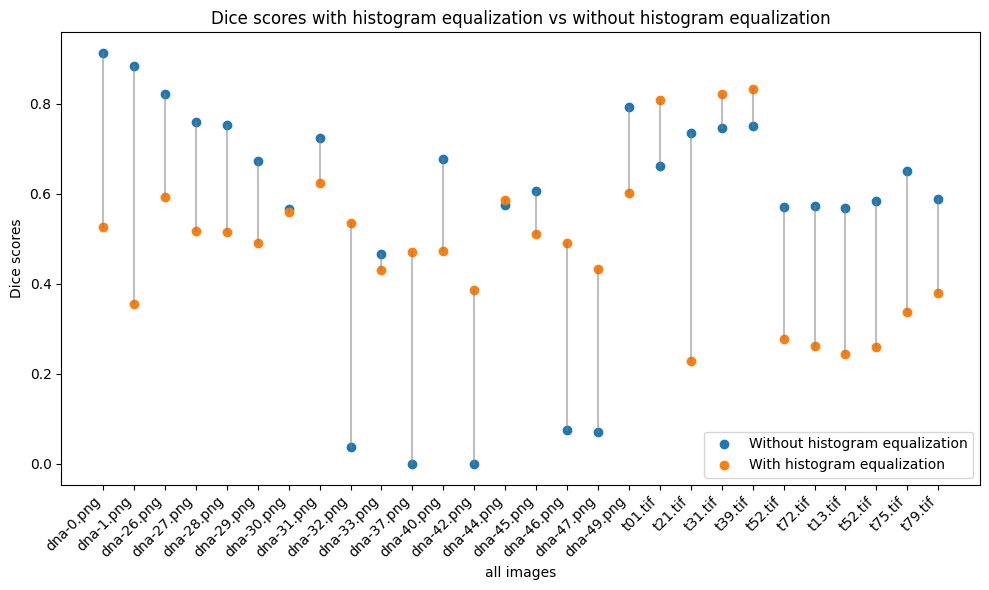

In [11]:


#-------------------------------
#PLOT FOR HISTOGRAM EQUALIZATION
#-------------------------------



# Load and combine all dice scores of histogram equalization in one 1D-array
# Load and combine for histogram equalization (eq)
NIH3T3_eq = np.load('Dice_score_vectors/histogram_equalization/NIH3T3_eq_dice_scores.npy')
N2DL_HeLa_eq = np.load('Dice_score_vectors/histogram_equalization/N2DL-HeLa_eq_dice_scores.npy')
N2DH_GOWT1_eq = np.load('Dice_score_vectors/histogram_equalization/N2DH-GOWT1_eq_dice_scores.npy')
all_dice_scores_eq = np.concatenate((NIH3T3_eq, N2DL_HeLa_eq, N2DH_GOWT1_eq))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/histogram_equalization/all_dice_scores_histeq', all_dice_scores_eq)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without histogram equalization')
plt.scatter(file_names, all_dice_scores_eq, color='C1', label='With histogram equalization')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_eq):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend(loc= 'lower right')
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('Dice scores with histogram equalization vs without histogram equalization')
plt.tight_layout()
plt.show()

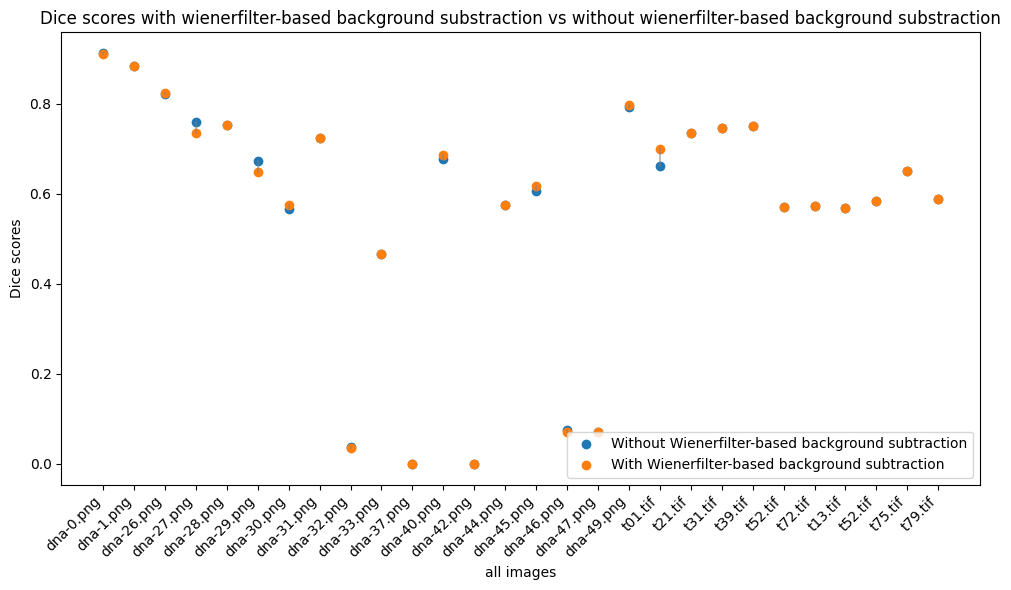

In [13]:

#---------------------
#PLOT FOR WIENERFILTER
#---------------------


# Load and combine all dice scores of wienerfilter in one 1D-array
# Load and combine for wienerfilter
NIH3T3_wf = np.load('Dice_score_vectors/wienerfilter/NIH3T3_wiener_dice_scores.npy')
N2DL_HeLa_wf = np.load('Dice_score_vectors/wienerfilter/N2DL-HeLa_wiener_dice_scores.npy')
N2DH_GOWT1_wf = np.load('Dice_score_vectors/wienerfilter/N2DH-GOWT1_wiener_dice_scores.npy')
all_dice_scores_wf = np.concatenate((NIH3T3_wf, N2DL_HeLa_wf, N2DH_GOWT1_wf))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/wienerfilter/all_dice_scores_wienerfilter', all_dice_scores_wf)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without Wienerfilter-based background subtraction')
plt.scatter(file_names, all_dice_scores_wf, color='C1', label='With Wienerfilter-based background subtraction')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_wf):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend(loc='lower right')
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('Dice scores with wienerfilter-based background substraction vs without wienerfilter-based background substraction')
plt.tight_layout()
plt.show()

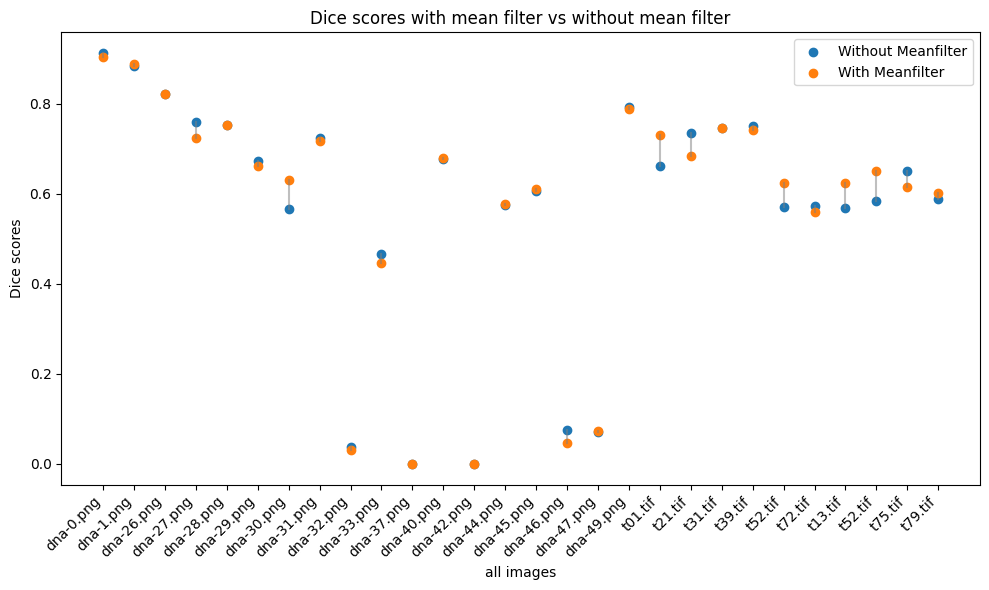

In [14]:

#-------------------
#PLOT FOR MEANFILTER
#-------------------


# Load and combine all dice scores of meanfilter  in one 1D-array
# Load and combine for meanfilter
NIH3T3_mean = np.load('Dice_score_vectors/Meanfilter/NIH3T3_Meanfilter_dice_scores.npy')
N2DL_HeLa_mean = np.load('Dice_score_vectors/Meanfilter/N2DL-HeLa_Meanfilter_dice_scores.npy')
N2DH_GOWT1_mean = np.load('Dice_score_vectors/Meanfilter/N2DH-GOWT1_Meanfilter_dice_scores.npy')
all_dice_scores_mean = np.concatenate((NIH3T3_mean, N2DL_HeLa_mean, N2DH_GOWT1_mean))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/Meanfilter/all_dice_scores_Meanfilter_Otsu', all_dice_scores_mean)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without Meanfilter')
plt.scatter(file_names, all_dice_scores_mean, color='C1', label='With Meanfilter')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_mean):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('Dice scores with mean filter vs without mean filter')
plt.tight_layout()
plt.show()